In [1]:
import wilds

In [2]:
import torchvision.transforms as transforms

In [3]:
import os
os.chdir("..")
os.getcwd()

'/storage/ice1/5/4/rso31/meadow'

In [4]:
dataset = wilds.get_dataset(dataset="iwildcam")

In [5]:
train_data = dataset.get_subset(
    "train",
    transform=transforms.Compose(
        [transforms.Resize((448, 448)), transforms.ToTensor()]
    ),
)

In [6]:
train_data[100][0].shape

torch.Size([3, 448, 448])

tensor(52)
tensor([  322, 33930,  2013,     2,    20,    10,     2,    18,    52,     1])


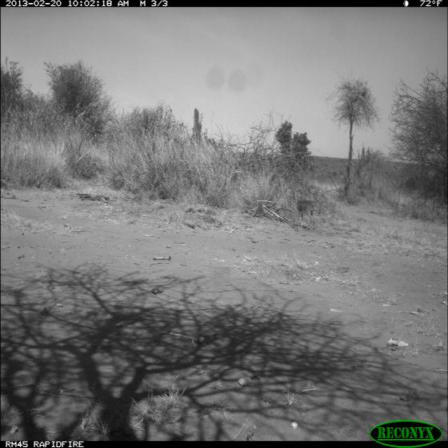

In [14]:
i = -1
print(train_data[i][1]) 
print(train_data[i][2])
transforms.functional.to_pil_image(train_data[i][0])

---

### Color Histograms

In [94]:
import torch

In [95]:
import matplotlib.pyplot as plt

In [198]:
i = 2020
example = train_data[i][0]
example.shape

torch.Size([3, 448, 448])

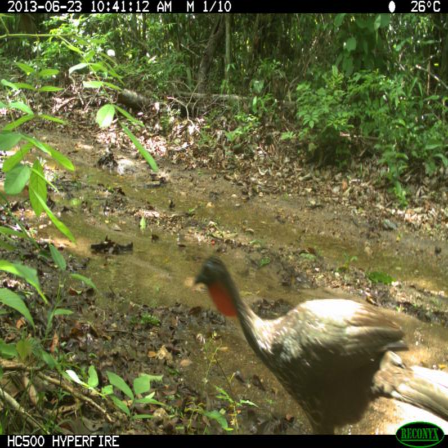

In [199]:
transforms.functional.to_pil_image(example)

In [200]:
hists = map(lambda x: torch.histogram(x, bins=256)[0], example)
hists = torch.vstack(tuple(hists))

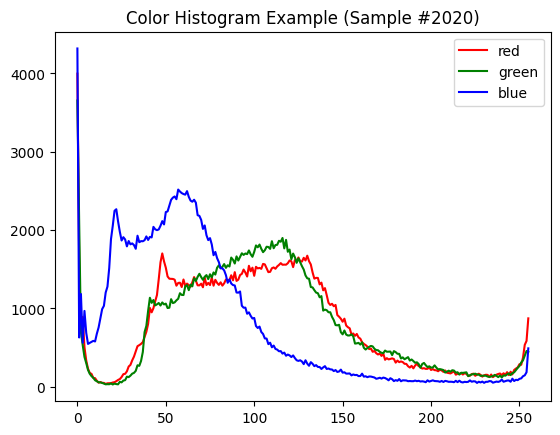

In [201]:
for ii, c in enumerate(['red', 'green', 'blue']):
    plt.plot(hists[ii], color=c[0], label=c)
plt.legend()
plt.title(f"Color Histogram Example (Sample #{i})")
plt.show()

In [205]:
# threshold = 100
th = (448 ** 2) // 2
def is_grayscale(img):
    return (img[0] == img[1]).flatten().sum() > th
    # hists = torch.vstack(tuple(map(lambda x:torch.histogram(x, bins=256)[0], example)))
    # return (
        # sum(hists[0] == hists[1]) > threshold 
        # and sum(hists[1] == hists[2]) > threshold 
        # and sum(hists[0] == hists[2]) > threshold
    # )

In [208]:
from tqdm import tqdm
import numpy as np

In [211]:
train_data.n_classes

182

In [223]:
c = 0
ssize = 1000
sample = np.random.choice(len(train_data), size=ssize, replace=False)
for ind in tqdm(sample):
    if is_grayscale(train_data[ind][0]):
        c += 1
print(f"Sampled {c} grayscale images out of {ssize} images")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.26it/s]

Sampled 489 grayscale images out of 1000 images


In [224]:
c / ssize

0.489